# xlseries use cases

This notebook shows the most common use cases applied to some of the currently passing test cases.

## Imports

In [1]:
# the user only uses this single class
from xlseries import XlSeries

# import methods to load parameters and test cases
from xlseries.utils.case_loaders import load_original_case, load_parameters_case

# import methods to nicely print the inputs in this notebook
from xlseries.utils.xl_methods import print_xl_range
from xlseries.utils.path_finders import get_screenshot_cases_path
from IPython.display import Image
from pprint import pprint as pp

## Test case 1

*Let's load and take a look of the inputs first*

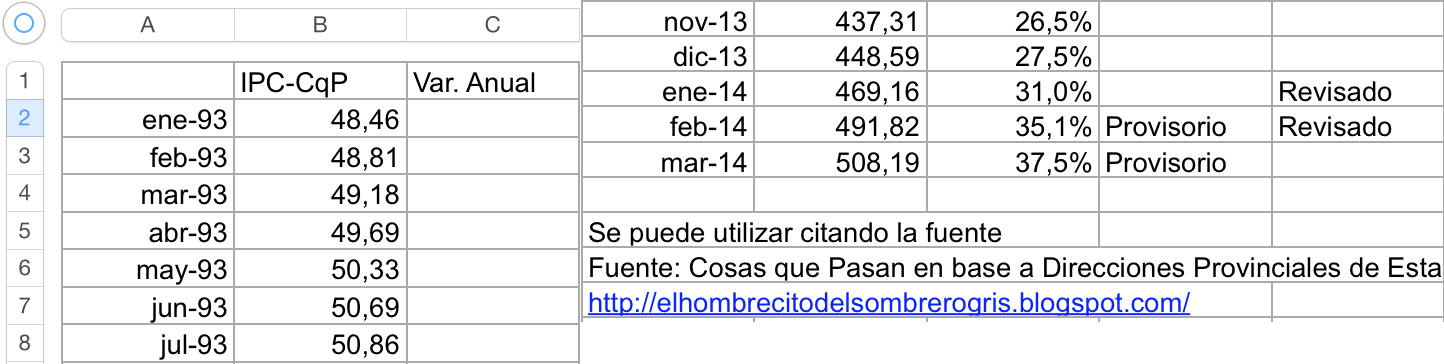

In [2]:
# load excel file to parse 
wb = load_original_case(1)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("1_ab"), height=200)

In [3]:
# load parameters to tell the parser how to do it
params = load_parameters_case(1)
pp(params)

{'alignment': [u'vertical', u'vertical'],
 'blank_rows': [False, False],
 'composed_headers': [False, False],
 'continuity': [True, True],
 'data_ends': [256, 256],
 'data_starts': [2, 2],
 'frequency': [u'M', u'M'],
 'headers_coord': [u'B1', u'C1'],
 'missing_value': [None, None],
 'missings': [True, True],
 'multifrequency': [False, False],
 'series_names': [None, None],
 'time_alignment': [0, 0],
 'time_composed': [False, False],
 'time_format': [<type 'datetime.datetime'>, <type 'datetime.datetime'>],
 'time_header': [False, False],
 'time_header_coord': [u'A1', u'A1'],
 'time_multicolumn': [False, False]}


In [4]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

In [5]:
print "Number of data frames parsed:", len(dfs)

df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

Number of data frames parsed: 1


,IPC-CqP,Var. Anual
1993-01,48.456885,NaN
1993-02,48.810834,NaN
1993-03,49.177819,NaN
1993-04,49.691889,NaN
1993-05,50.331205,NaN
1993-06,50.693241,NaN
1993-07,50.856318,NaN
1993-08,50.864473,NaN
1993-09,51.283639,NaN
1993-10,51.573538,NaN


## Test case 2

*Let's load and take a look of the inputs first*

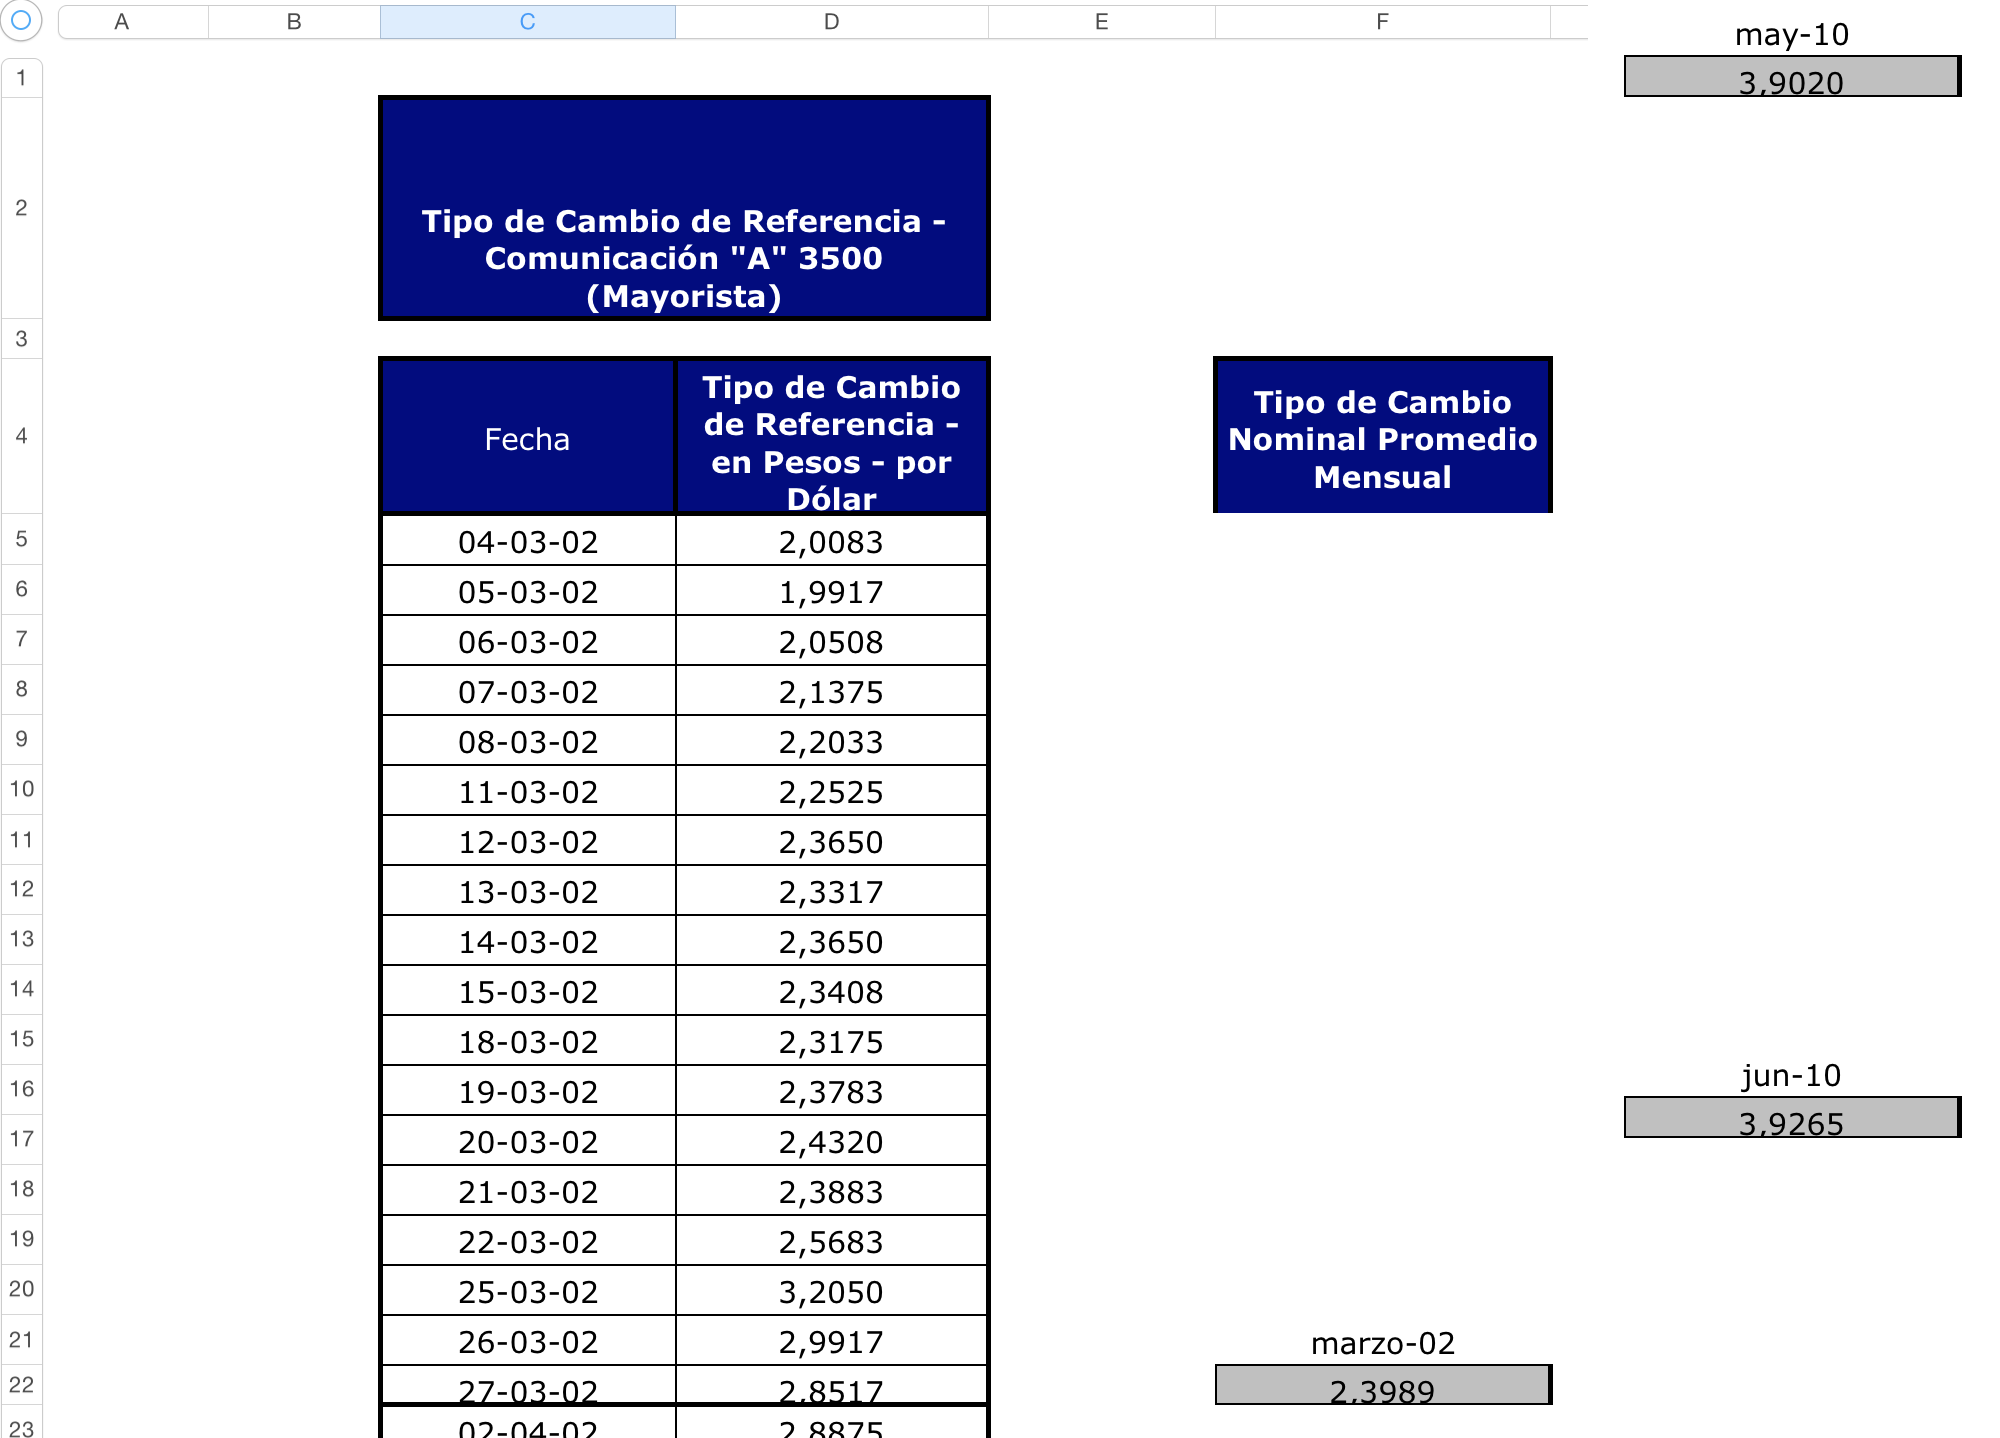

In [6]:
# load excel file to parse 
wb = load_original_case(2)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("2_ed"), height=600)

*In this case there are **mistakes** in the time index values*

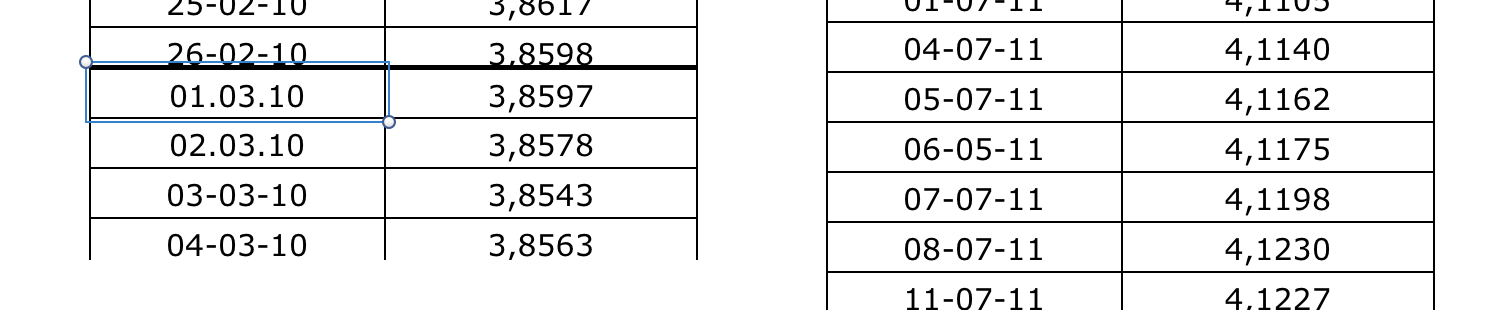

In [7]:
Image(filename=get_screenshot_cases_path("2_bc"), height=200)

*On the left, there are some date values with different separators. Those ones are not parsed by `openpyxl` as datetime.datetime but as strings.*

*On the right, there is a mistake in the month of the day number 6, that should be **07** *

In [8]:
# load parameters to tell the parser how to do it
params = load_parameters_case(2)
pp(params)

{'alignment': [u'vertical', u'vertical'],
 'blank_rows': [False, True],
 'composed_headers': [False, False],
 'continuity': [True, False],
 'data_ends': [2993, 2986],
 'data_starts': [5, 22],
 'frequency': [u'D', u'M'],
 'headers_coord': [u'D4', u'F4'],
 'missing_value': [u'Implicit', None],
 'missings': [True, False],
 'multifrequency': [False, False],
 'series_names': [None, None],
 'time_alignment': [0, -1],
 'time_composed': [False, False],
 'time_format': [<type 'datetime.datetime'>, <type 'datetime.datetime'>],
 'time_header': [True, False],
 'time_header_coord': [u'C4', u'F4'],
 'time_multicolumn': [False, False]}


In [9]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

make sense 2009-12-17T00:00:00+00:00
make sense 2010-03-02T00:00:00+00:00
make sense 2010-03-01T00:00:00+00:00
make sense 2010-03-02T00:00:00+00:00
make sense 2010-03-10T00:00:00+00:00
make sense 2010-03-23T00:00:00+00:00
make sense 2010-05-03T00:00:00+00:00
make sense 2010-08-19T00:00:00+00:00
Number of data frames parsed: 2


*First, we print the **daily** data frame*

In [10]:
df = dfs[0]  # [Number of data frame][0=evaluation_ratio, 1=data_frame]
df[:10]  # [Slicing data frame rows]

,Tipo de Cambio de Referencia - en Pesos - por Dolar
2002-03-04,2.0083
2002-03-05,1.9917
2002-03-06,2.0508
2002-03-07,2.1375
2002-03-08,2.2033
2002-03-09,NaN
2002-03-10,NaN
2002-03-11,2.2525
2002-03-12,2.3650
2002-03-13,2.3317


*Now, we print the **monthly** data frame*

In [11]:
df = dfs[1]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Tipo de Cambio Nominal Promedio Mensual
2002-03,2.398856
2002-04,2.855106
2002-05,3.328700
2002-06,3.621300
2002-07,3.607136
2002-08,3.620710
2002-09,3.643076
2002-10,3.651882
2002-11,3.525550
2002-12,3.490171


## Test case 3

*Let's load and take a look of the inputs first*

/Users/abenassi/anaconda/envs/xlseries/lib/python2.7/site-packages/openpyxl/workbook/names/named_range.py:121: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


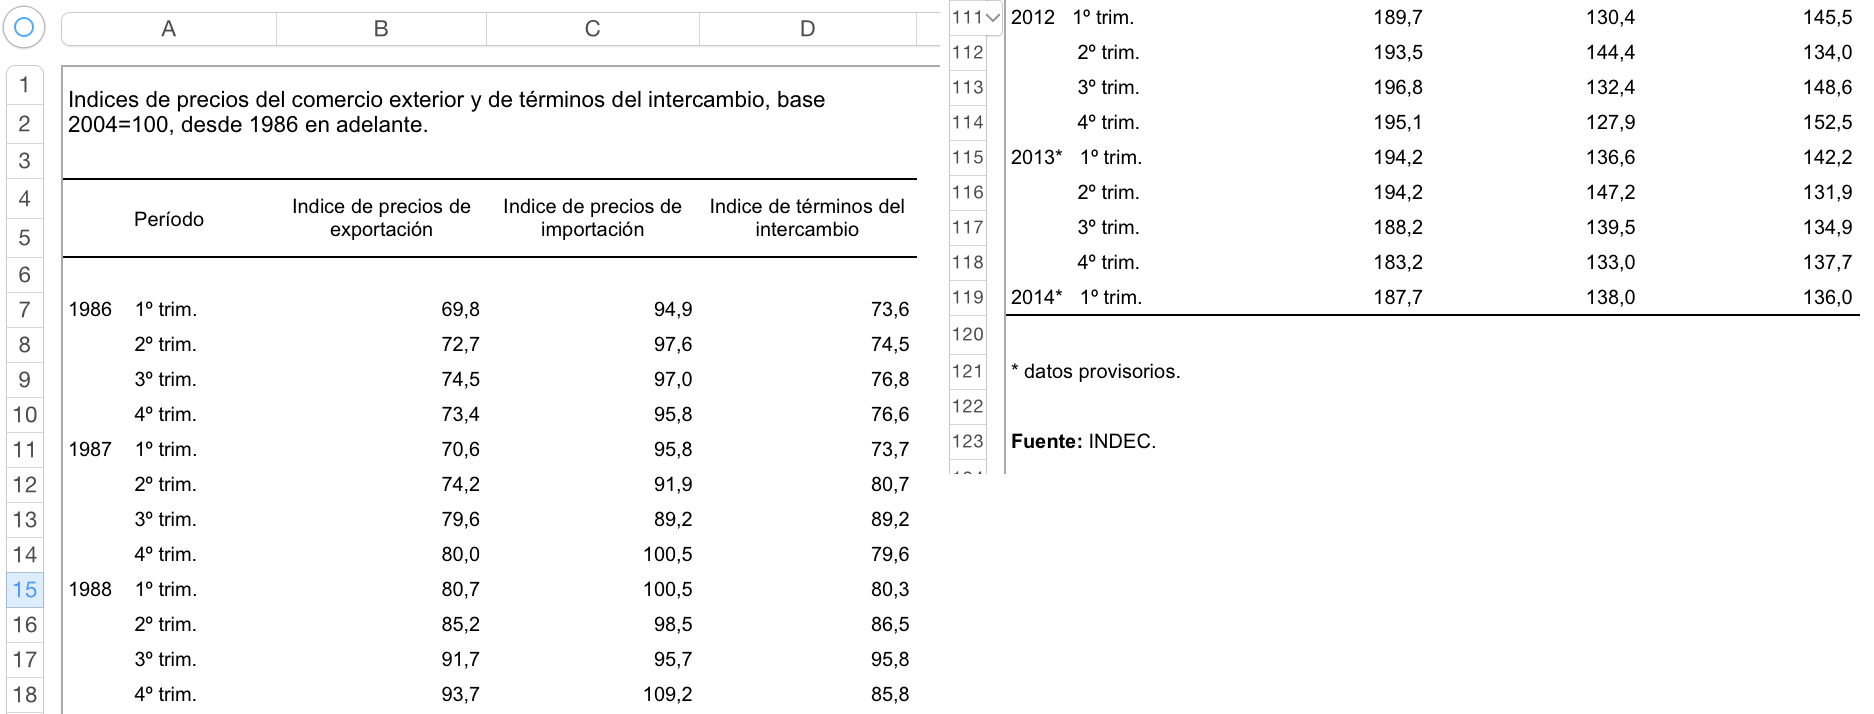

In [12]:
# load excel file to parse 
wb = load_original_case(3)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("3_ab"), width=900)

In [13]:
# load parameters to tell the parser how to do it
params = load_parameters_case(3)
pp(params)

{'alignment': [u'vertical', u'vertical', u'vertical'],
 'blank_rows': [False, False, False],
 'composed_headers': [False, False, False],
 'continuity': [True, True, True],
 'data_ends': [119, 119, 119],
 'data_starts': [7, 7, 7],
 'frequency': [u'Q', u'Q', u'Q'],
 'headers_coord': [u'B4', u'C4', u'D4'],
 'missing_value': [None, None, None],
 'missings': [False, False, False],
 'multifrequency': [False, False, False],
 'series_names': [None, None, None],
 'time_alignment': [0, 0, 0],
 'time_composed': [True, True, True],
 'time_format': [<type 'str'>, <type 'str'>, <type 'str'>],
 'time_header': [True, True, True],
 'time_header_coord': [u'A4', u'A4', u'A4'],
 'time_multicolumn': [False, False, False]}


In [14]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 1


In [15]:
df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Indice de precios de exportacion,Indice de precios de importacion,Indice de terminos del intercambio
1986Q1,69.8,94.9,73.551106
1986Q2,72.7,97.6,74.487705
1986Q3,74.5,97.0,76.804124
1986Q4,73.4,95.8,76.617954
1987Q1,70.6,95.8,73.695198
1987Q2,74.2,91.9,80.739935
1987Q3,79.6,89.2,89.237668
1987Q4,80.0,100.5,79.601990
1988Q1,80.7,100.5,80.298507
1988Q2,85.2,98.5,86.497462
